# Import Dependencies

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
df = pd.read_csv("dataset/pcos_dataset.csv")

# EDA

In [361]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


Diketahui bahwa terdapat sebuah dataset yang memiliki data orang orang yang telah didiagnosa mengalami gangguan hormon atau tidak dengan fitur fitur yang ada :

- Usia (tahun): Usia pasien, berkisar antara 18 hingga 45 tahun.
- BMI (kg/m²): Indeks Massa Tubuh, yang merupakan ukuran lemak tubuh berdasarkan tinggi dan berat badan, berkisar antara 18 hingga 35.
- Ketidakteraturan Menstruasi (biner): Indikator biner yang menunjukkan apakah pasien memiliki siklus menstruasi yang tidak teratur (0 = Tidak, 1 = Ya).
- Kadar Testosteron (ng/dL): Kadar testosteron dalam darah pasien, indikator hormonal penting PCOS, berkisar antara 20 hingga 100 ng/dL.
- Jumlah Folikel Antral: Jumlah folikel antral yang terdeteksi selama USG, berkisar antara 5 hingga 30, yang membantu dalam menilai cadangan ovarium dan keberadaan PCOS. Variabel Target:
- Diagnosis PCOS (biner): Indikator biner yang menunjukkan apakah pasien telah didiagnosis dengan PCOS (0 = Tidak, 1 = Ya), berdasarkan kombinasi faktor risiko seperti BMI tinggi, kadar testosteron, menstruasi tidak teratur, dan jumlah folikel antral.

Kita akan mencari pola orang yang terkena gangguan hormon itu bagaimana dengan machine learning

In [362]:
data = df.copy()

In [363]:
data = data.rename(columns={'Testosterone_Level(ng/dL)' : 'Testosterone_Level'})

In [364]:
data

,Age,BMI,Menstrual_Irregularity,Testosterone_Level,Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


In [365]:
data['PCOS_Diagnosis'].value_counts()

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1000 non-null   int64  
 1   BMI                     1000 non-null   float64
 2   Menstrual_Irregularity  1000 non-null   int64  
 3   Testosterone_Level      1000 non-null   float64
 4   Antral_Follicle_Count   1000 non-null   int64  
 5   PCOS_Diagnosis          1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [367]:
# identifikasi data duplikat
data.duplicated().sum()

np.int64(0)

In [368]:
data.isnull().sum()

Age                       0
BMI                       0
Menstrual_Irregularity    0
Testosterone_Level        0
Antral_Follicle_Count     0
PCOS_Diagnosis            0
dtype: int64

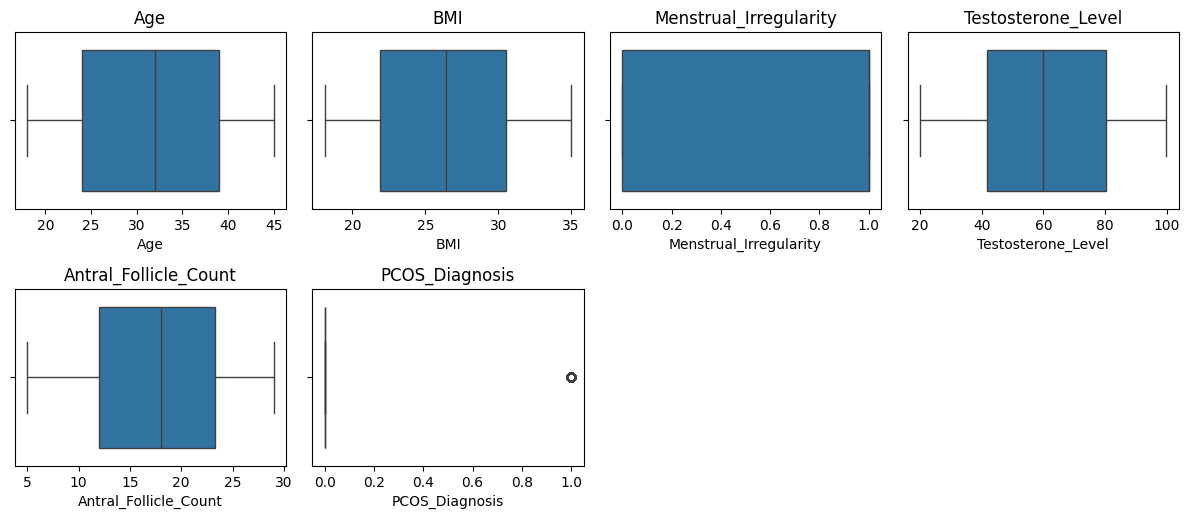

In [369]:
# identifikasi outlier
plt.figure(figsize=(12,10))

for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=data, x=data[col])
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()


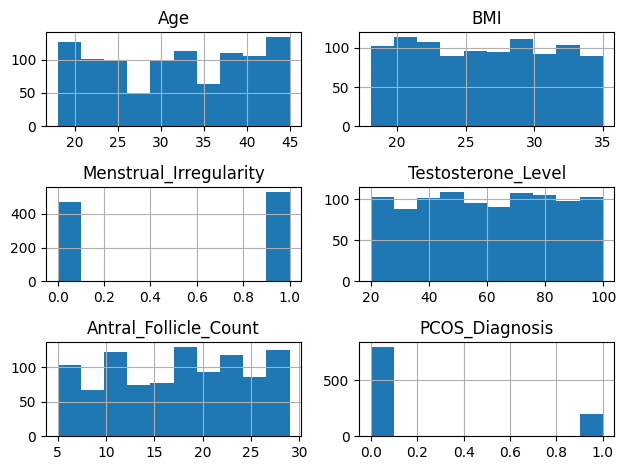

In [370]:
data.hist()
plt.tight_layout()
plt.show()

<Axes: >

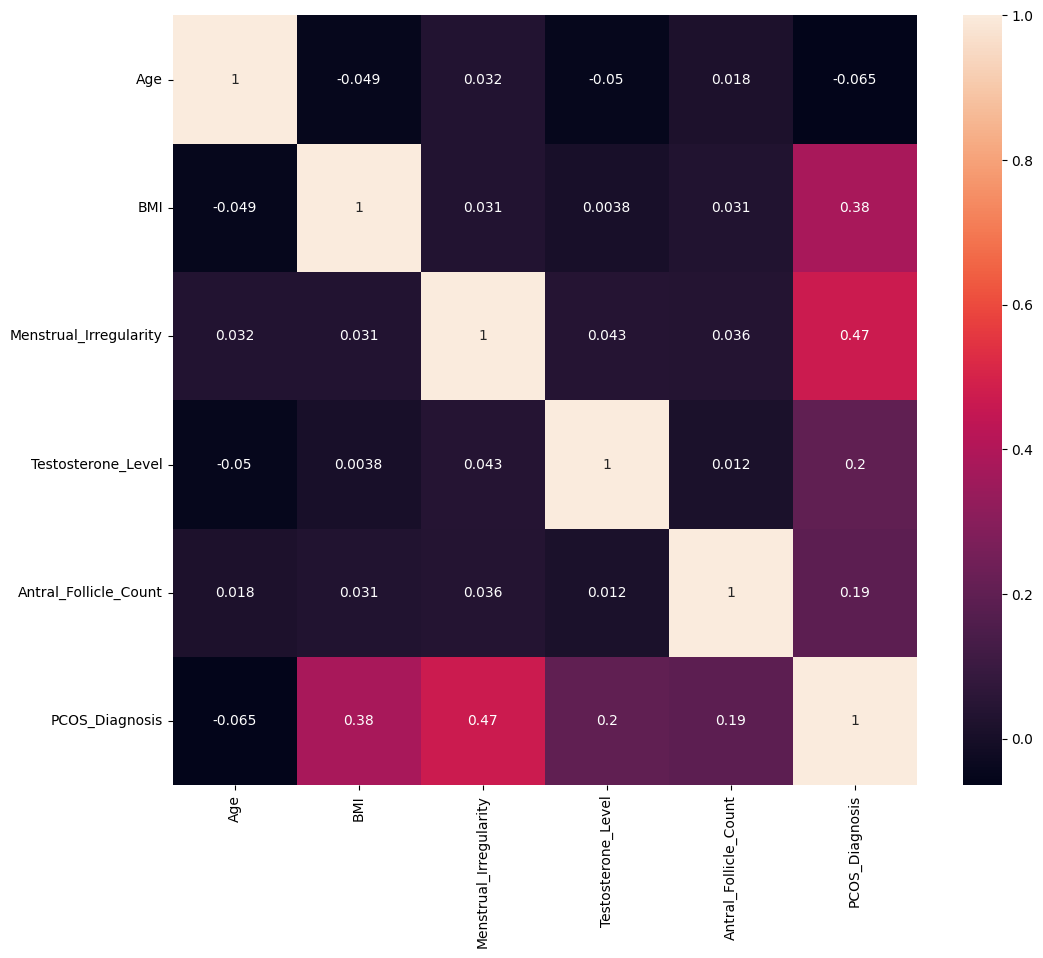

In [371]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

### Start with simple model

In [372]:
X = data.drop(['PCOS_Diagnosis', 'Age'], axis = True)
y = data['PCOS_Diagnosis']

In [373]:
#feature scalling

def standart_scaler(X):
    x = np.array(X)
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean)/std

def minmax(X):
    x = np.array(X)
    x_min = min(X)
    x_max = max(X)
    return (x - x_min) / (x_max - x_min)

In [374]:
X = X.apply(minmax)
X

,BMI,Menstrual_Irregularity,Testosterone_Level,Antral_Follicle_Count
0,0.982249,1.0,0.065163,0.625000
1,0.491124,0.0,0.464912,0.833333
2,0.325444,0.0,0.911028,0.958333
3,0.633136,0.0,0.540100,0.875000
4,0.236686,1.0,0.498747,0.125000
...,...,...,...,...
995,0.017751,1.0,0.948622,0.750000
996,0.639053,1.0,0.106516,0.083333
997,0.603550,0.0,0.155388,0.958333
998,0.544379,0.0,0.947368,0.166667


In [375]:
def train_test_split(X, y, test_size, random_state = None):
    if random_state is not None:
        np.random.seed(random_state)

    total_sample = X.shape[0]

    indicies = np.random.permutation(total_sample)

    split = int(total_sample * (1 - test_size))

    X_train = X.iloc[indicies[:split]]
    X_test = X.iloc[indicies[split:]]
    y_train = y.iloc[indicies[:split]]
    y_test = y.iloc[indicies[split:]]

    return X_train, X_test, y_train, y_test 

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [377]:
print(X_train.shape)

(800, 4)


In [378]:
y_test

556    1
957    0
577    0
795    0
85     0
      ..
106    0
270    0
860    0
435    0
102    1
Name: PCOS_Diagnosis, Length: 200, dtype: int64

In [379]:
class KNN:
    def __init__(self, k=2, weight='uniform'):
        self.k = k
        self.weight = weight
        self.X_train = None
        self.y_train = None

    #model.fit()
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train, dtype=float)
        self.y_train = np.array(y_train, dtype=float)

    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

    def get_neighbors(self, test_point):
        distance = []
        for X, y in zip(self.X_train, self.y_train):
            dist = self.euclidean_distance(X, test_point)
            distance.append((dist, y))

        distance.sort(key=lambda x: x[0])
        return distance[:self.k]

    def predict(self, X_test):
        X_test = np.array(X_test, dtype=float)
        prediction = []
        for point in X_test:
            neighbors = self.get_neighbors(point)

            if self.weight == 'uniform' :
                labels = [label for _, label in neighbors]
                pred = max(set(labels), key=labels.count)

            elif self.weight == 'distance' :
                label_weight = {}
                for dist, label in neighbors:
                    weight = 1 / (dist + 1e-5)
                    if label in label_weight:
                        label_weight[label] += weight
                    else :
                        label_weight[label] = weight

                pred = max(label_weight.items(), key = lambda x: x[1])[0]

            else :
                raise ValueError("masukkan weight!")
            prediction.append(pred)
        return prediction


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.sum(np.array(y_pred) == np.array(y_test)) / len(y_test)*100
        return accuracy

In [380]:
model = KNN(k = 5, weight='distance')

In [381]:
model.fit(X_train, y_train)

In [382]:
model.score(X_test, y_test)

np.float64(95.5)

In [383]:
model.score(X_train, y_train)

np.float64(100.0)

In [384]:
from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier(weights='distance')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.955

In [385]:
lr.score(X_train, y_train)

1.0